<a href="https://colab.research.google.com/github/Adithya-Siddam/WDM_EXP8/blob/main/exp_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter product to search on Snapdeal: resist sunglasses
Product: RESIST EYEWEAR - Black Rectangular Sunglasses ( Pack of 1 )
Price: 945.0
Rating: 94.0%
---
Product: RESIST EYEWEAR - Silver Rectangular Sunglasses ( Pack of 1 )
Price: 945.0
Rating: 94.0%
---
Product: RESIST EYEWEAR - Black Pilot Sunglasses ( Pack of 1 )
Price: 945.0
Rating: 90.0%
---
Product: RESIST EYEWEAR - Black Round,Pilot Sunglasses ( Pack of 1 )
Price: 945.0
Rating: 90.0%
---
Product: RESIST EYEWEAR - Black Rectangular Sunglasses ( Pack of 1 )
Price: 945.0
Rating: 90.0%
---
Product: RESIST EYEWEAR - Black Pilot Sunglasses ( Pack of 1 )
Price: 939.0
Rating: 90.0%
---
Product: RESIST EYEWEAR - Gold Pilot Sunglasses ( Pack of 1 )
Price: 945.0
Rating: 90.0%
---
Product: RESIST EYEWEAR - White Rectangular Sunglasses ( Pack of 1 )
Price: 755.0
Rating: 88.00000000000001%
---
Product: RESIST EYEWEAR - Green Pilot Sunglasses Pack of 1
Price: 945.0
Rating: 88.00000000000001%
---
Product: RESIST EYEWEAR - Black Square Sunglass

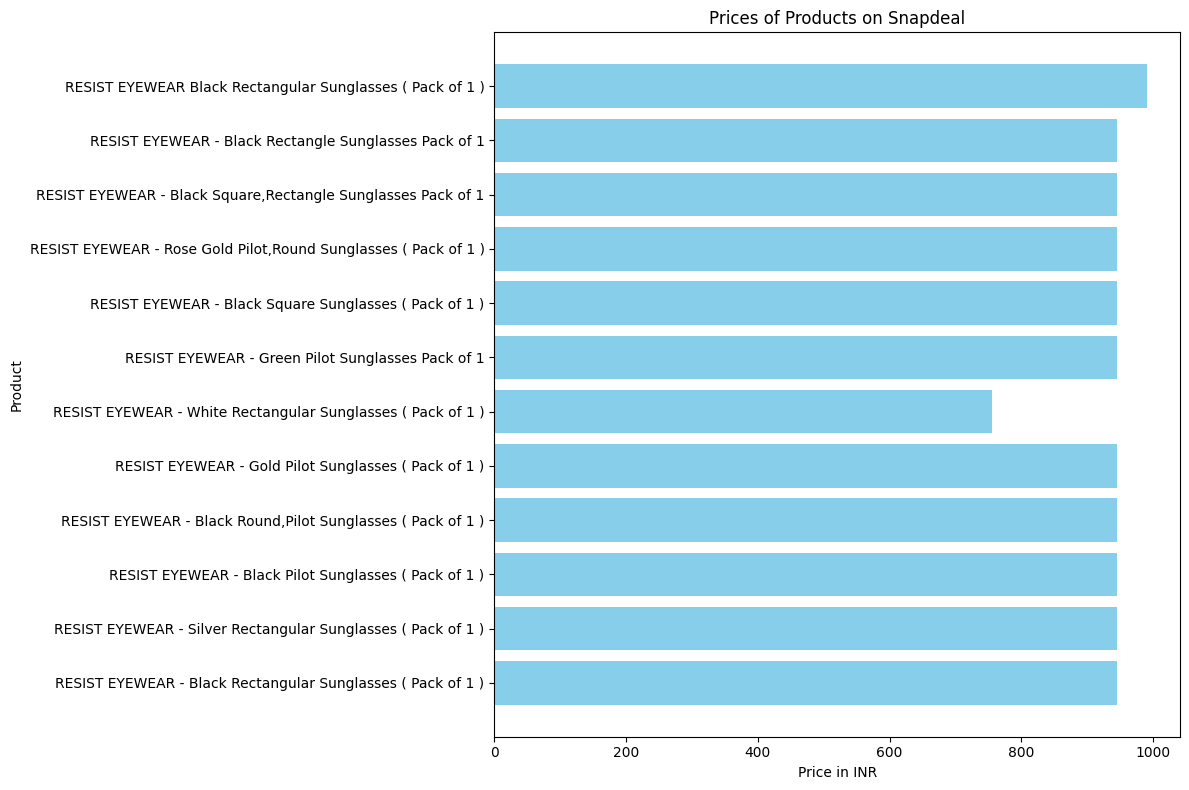

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re

def convert_price_to_float(price_str):
    # Remove currency symbols and commas, then convert to float
    clean_price = re.sub(r'[^\d.]', '', price_str)  # Keep digits and decimal point
    return float(clean_price) if clean_price else 0.0

def get_snapdeal_products(search_query):
    url = f'https://www.snapdeal.com/search?keyword={search_query.replace(" ", "%20")}'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'
    }

    response = requests.get(url, headers=headers)
    products_data = []

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        products = soup.find_all('div', {'class': 'product-tuple-listing'})

        for product in products:
            title = product.find('p', {'class': 'product-title'})
            price = product.find('span', {'class': 'product-price'})
            if price:
                product_price = convert_price_to_float(price.get('data-price', '0'))
            else:
                product_price = 0.0  # Default to 0 if no price found
            rating = product.find('div', {'class': 'filled-stars'})  # Assuming rating is shown with this class

            if title and price:
                product_name = title.text.strip()
                #product_price = re.sub(r'[^\d.]', '', price.text.strip())  # Remove non-numeric chars for price
                product_rating = rating['style'].split(';')[0].split(':')[-1] if rating else "No rating"
                products_data.append({
                    'Product': product_name,
                    'Price': float(product_price),
                    'Rating': product_rating
                })
                print(f'Product: {product_name}')
                print(f'Price: {product_price}')
                print(f'Rating: {product_rating}')
                print('---')

    else:
        print('Failed to retrieve content')

    return products_data

# Main execution block
if __name__ == "__main__":
    search_query = input('Enter product to search on Snapdeal: ')
    products = get_snapdeal_products(search_query)

def visualize_product_data(products):
    if products:
        # Preparing data for plotting
        #product_names = [product['Product'][:25] + '...' if len(product['Product']) > 25 else product['Product'] for product in products]
        product_names = [product['Product'] for product in products]
        product_prices = [product['Price'] for product in products]

        # Creating the bar chart
        plt.figure(figsize=(12, 8))
        bars = plt.barh(product_names, product_prices, color='skyblue')  # Horizontal bar chart

        plt.xlabel('Price in INR')  # Label for x-axis
        plt.ylabel('Product')  # Label for y-axis
        plt.title(f'Prices of Products on Snapdeal')
        plt.tight_layout()
        # Displaying the plot
        plt.show()
    else:
        print('No products to display.')
visualize_product_data(products)